In [35]:
import numpy as np
from matplotlib import pyplot 
from numpy.random import normal
from scipy.stats import norm

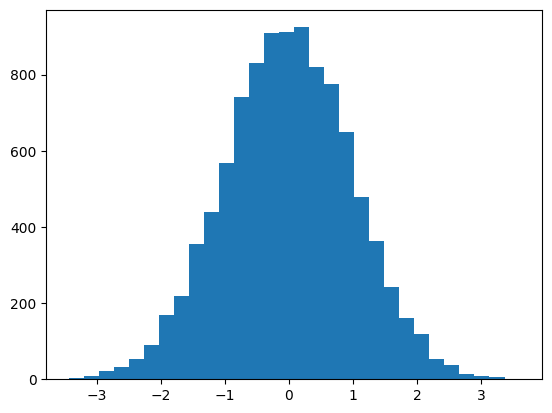

In [36]:
sample = normal(size=10000) # generador aleatorio basado en la distribución normal
pyplot.hist(sample, bins=30) 
pyplot.show()

## Estimación paramétrica

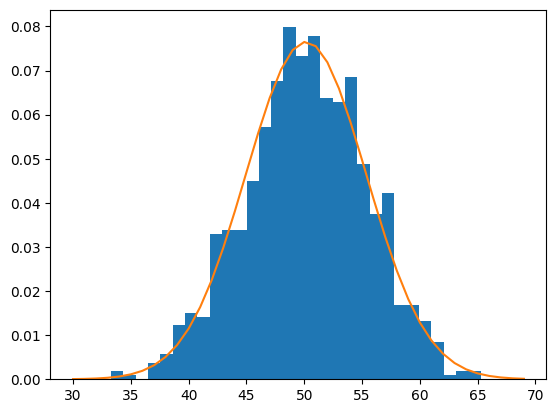

In [37]:
sample = normal(loc=50, scale=5, size=1000) # mu = 50, sigma = 5
mu = sample.mean() # media de los datos de sample
sigma = sample.std() # std de sample
dist = norm(mu, sigma) # forma gauseana de mu y sigma 
values = [value for value in range(30, 70)] 
probabilities = [dist.pdf(value) for value in values] # va aplicar la funcion de densidad de p de un valor por cada valor en los valores 
pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilities)
pyplot.show()


# Estimación no paramétrica

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html


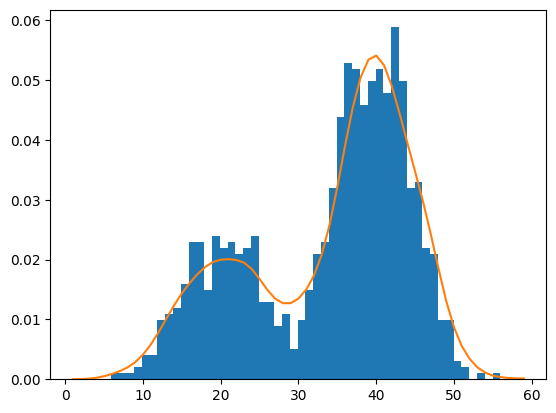

In [48]:
from numpy import hstack #junta varios arreglos
from sklearn.neighbors import KernelDensity #suma funciones bases 

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian') # parametro de suavisado, kernel = tipo de funcion 
sample = sample.reshape((len(sample), 1))# arregla la estructura de datos a una columna 
model.fit(sample) #se ajusten los datos 

pyplot.hist(sample, bins=50, density=True) 
pyplot.plot(values[:], probabilities)
pyplot.show()


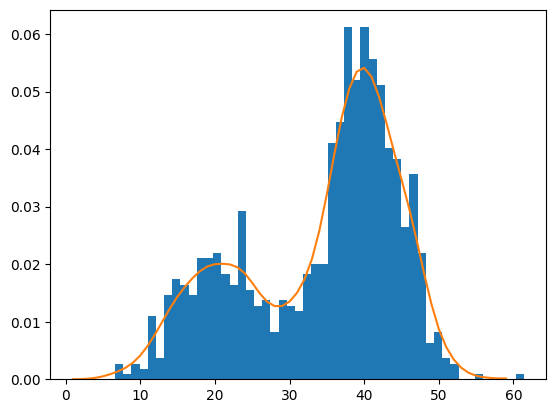

In [39]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad

pyplot.hist(sample, bins=50, density=True) 
pyplot.plot(values[:], probabilities)
pyplot.show()

[1050000.]


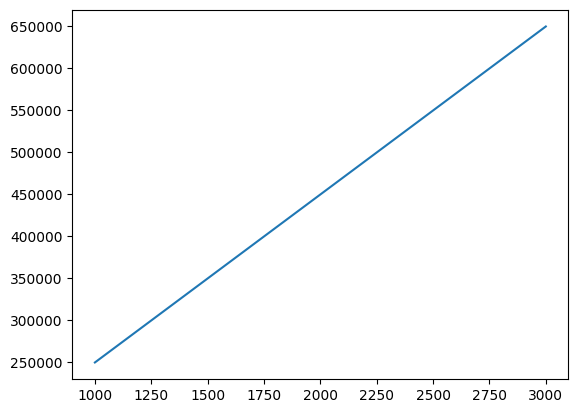

In [50]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = [1000, 1500, 2000, 2500, 3000]
y = [250000, 350000, 450000, 550000, 650000]
# Crear el modelo
model = LinearRegression()

X_reshaped = np.array(X).reshape(-1, 1)

# Entrenar el modelo
model.fit(X_reshaped, y)
# Predecir el precio de una casa de 1800 pies cuadrados
new_x = [[5000]]
predicted_price = model.predict(new_x)

print(predicted_price)
plt.plot(X,y)
